## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [44]:
# Import necessary libraries
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
X, y = make_classification(n_samples=10000,n_features=8, n_informative=5, class_sep=2, random_state = 42)
df_rand = pd.DataFrame(X)
df_rand

,0,1,2,3,4,5,6,7
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770
...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019


In [28]:
# Check duplicate values and missing data.
print(df_rand.isna().sum())
print(df_rand.duplicated().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64
0


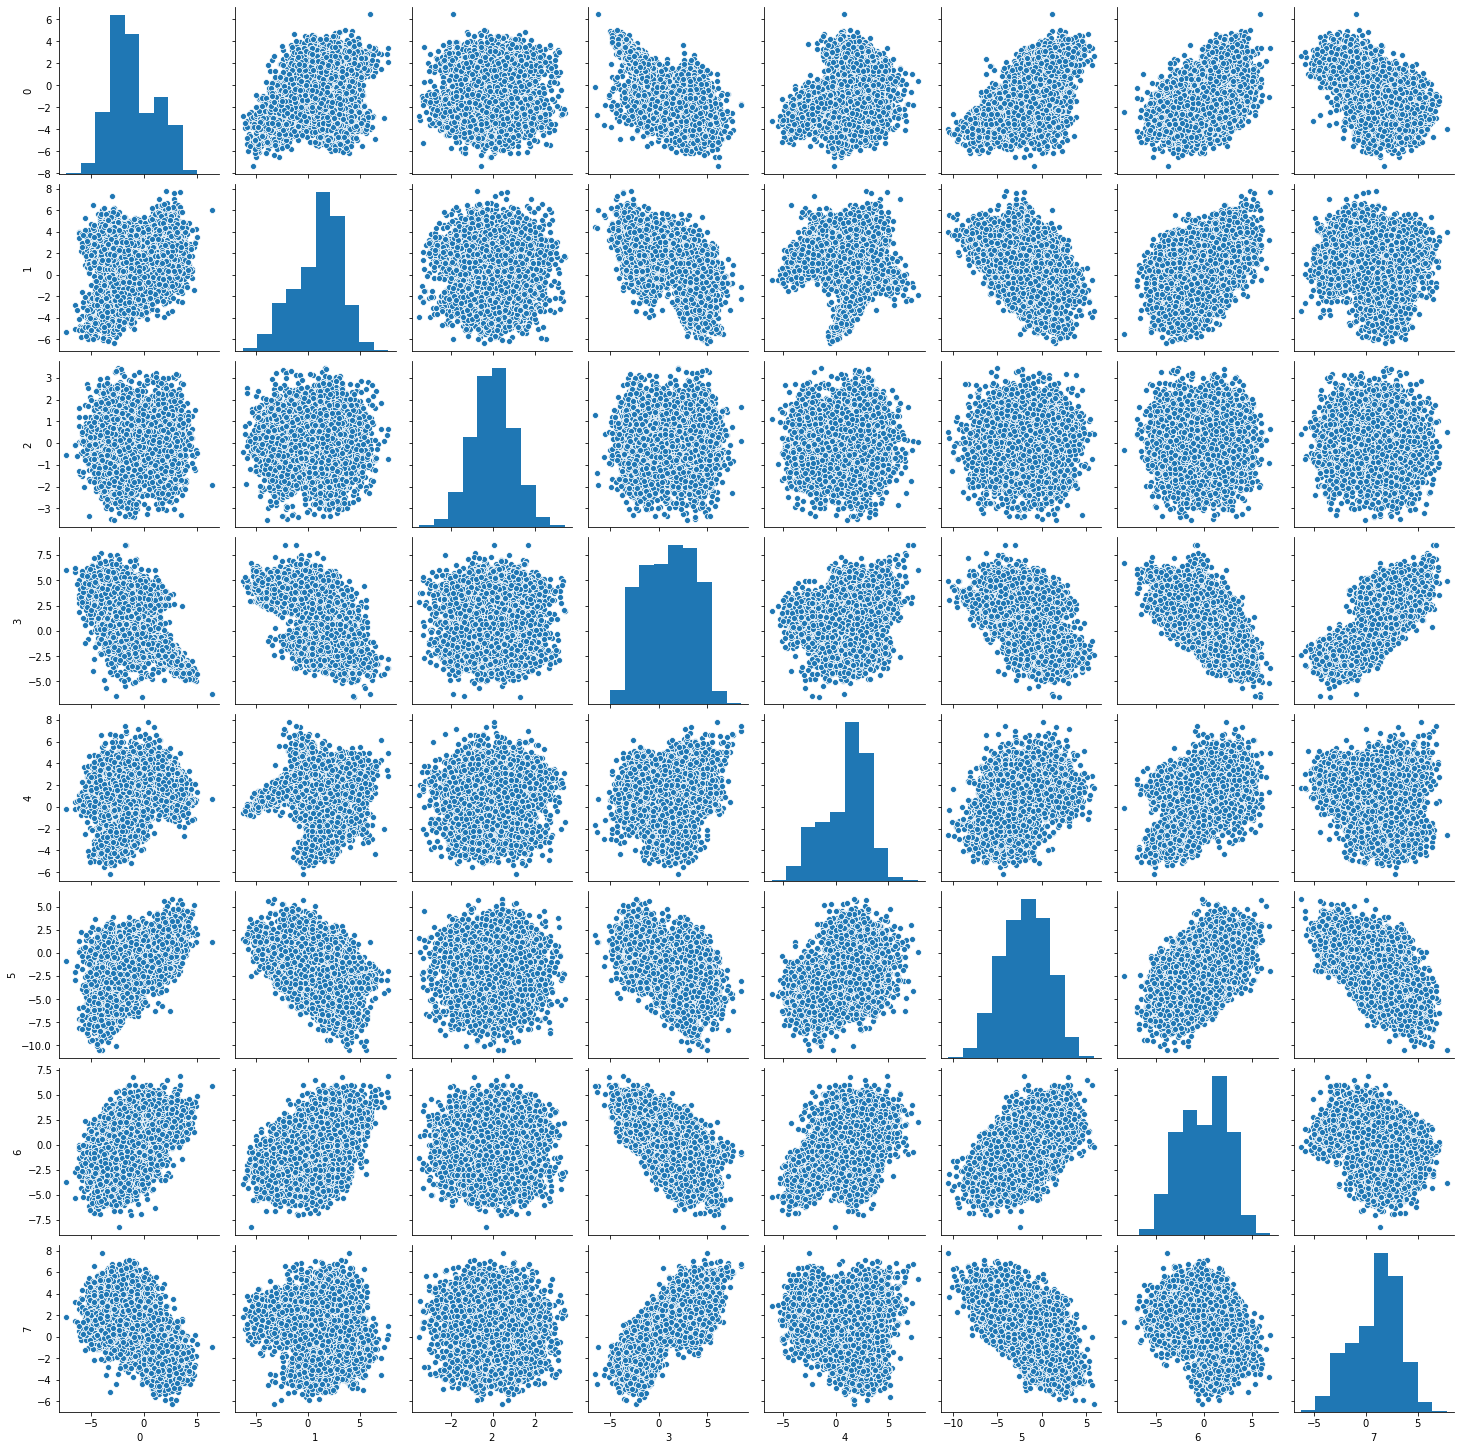

In [31]:
# Visualize data for each feature (pairplot,distplot).
sns.pairplot(df_rand)

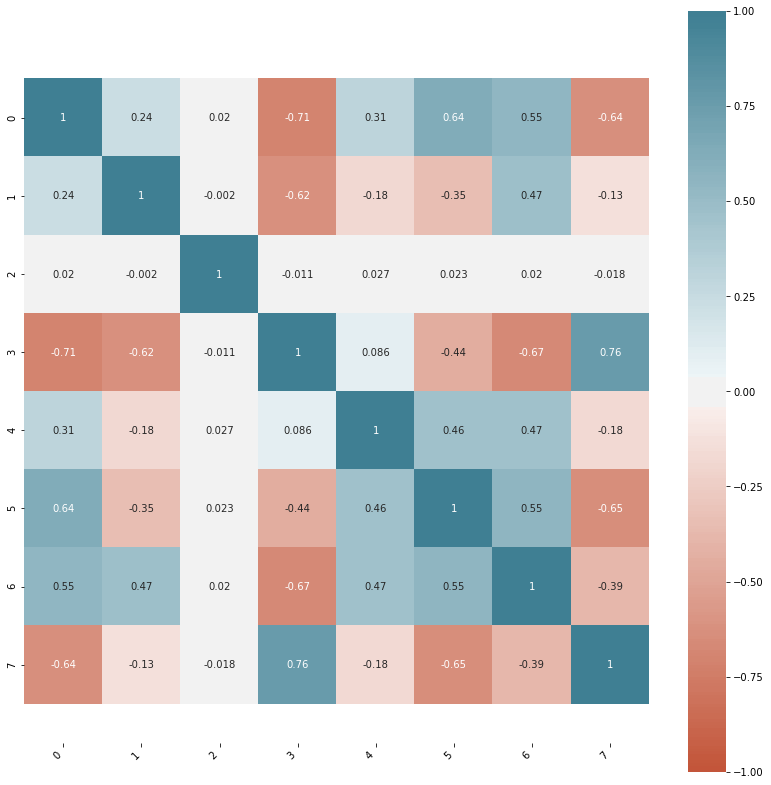

In [36]:
# Draw correlation matrix.
corr = df_rand.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [46]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)
z = np.abs(stats.zscore(df_rand))
outliers = list(set(np.where(z > 3)[0]))

new_df = df_rand.drop(outliers,axis = 0).reset_index(drop = False)
y_new = y[list(new_df["index"])]
X_new = new_df.drop('index', axis = 1)

display(new_df)

,index,0,1,2,3,4,5,6,7
0,0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770
...,...,...,...,...,...,...,...,...,...
9937,9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324
9938,9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303
9939,9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036
9940,9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019


In [48]:
# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new, test_size=0.3, random_state=42)

,0,1,2,3,4,5,6,7
641,-0.069371,1.229015,0.429719,-0.547598,2.649066,-0.549247,0.388909,-2.530040
4180,0.761285,-0.542904,-0.588264,1.899889,3.530207,0.651816,1.673741,1.894903
4864,0.476979,1.300220,0.471183,-1.081698,2.868749,0.021890,0.784828,-3.050397
9039,-2.358605,-0.721992,0.756643,5.538385,2.114409,-5.763805,-5.829102,1.646381
8916,1.833524,-2.397165,-0.048838,-1.276499,1.759650,4.193201,0.304289,-3.805778
...,...,...,...,...,...,...,...,...
5734,-0.219780,0.409449,-0.731946,2.868709,3.749015,-1.558720,0.913585,2.741701
5191,-1.652293,4.312069,0.117801,-0.878567,-0.421362,-3.447555,2.423791,1.980754
5390,2.075378,6.168419,2.684406,-2.871008,3.401224,-2.448594,4.066022,-0.935355
860,-1.198821,-1.486445,-0.759996,3.718207,1.761309,-1.258092,-1.002137,3.065273


In [57]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9758632249413343


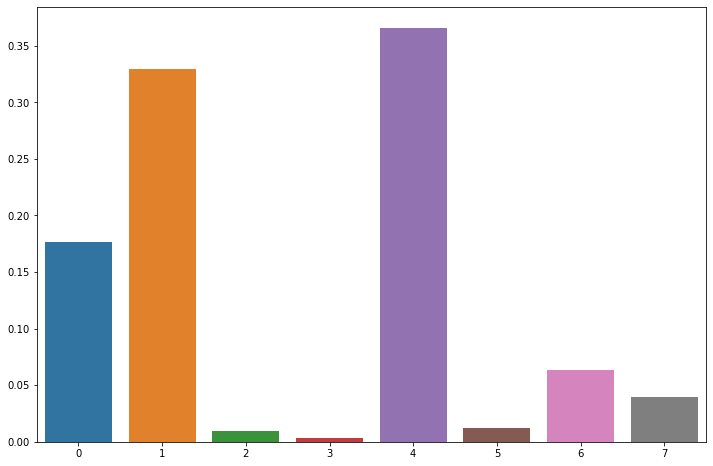

In [63]:
# Visualize feature importances.
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
importance
sns.barplot(x=[0,1,2,3,4,5,6,7], y=importance)
plt.show()

Precision = 0.9759005330993994
Recall = 0.9758016418748245
Accuracy = 0.9758632249413343
F1 Score = 0.9758471316950732


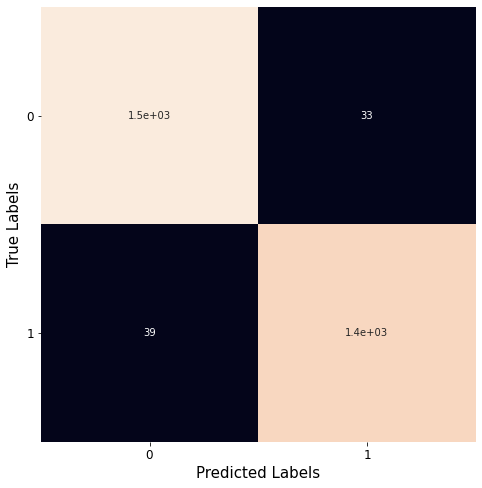

In [73]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))


categories = list([0,1,2,3,4,5,6,7])

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [78]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.
import xgboost as xgb
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)


param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

preds = model.predict(dmatrix_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

[22:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


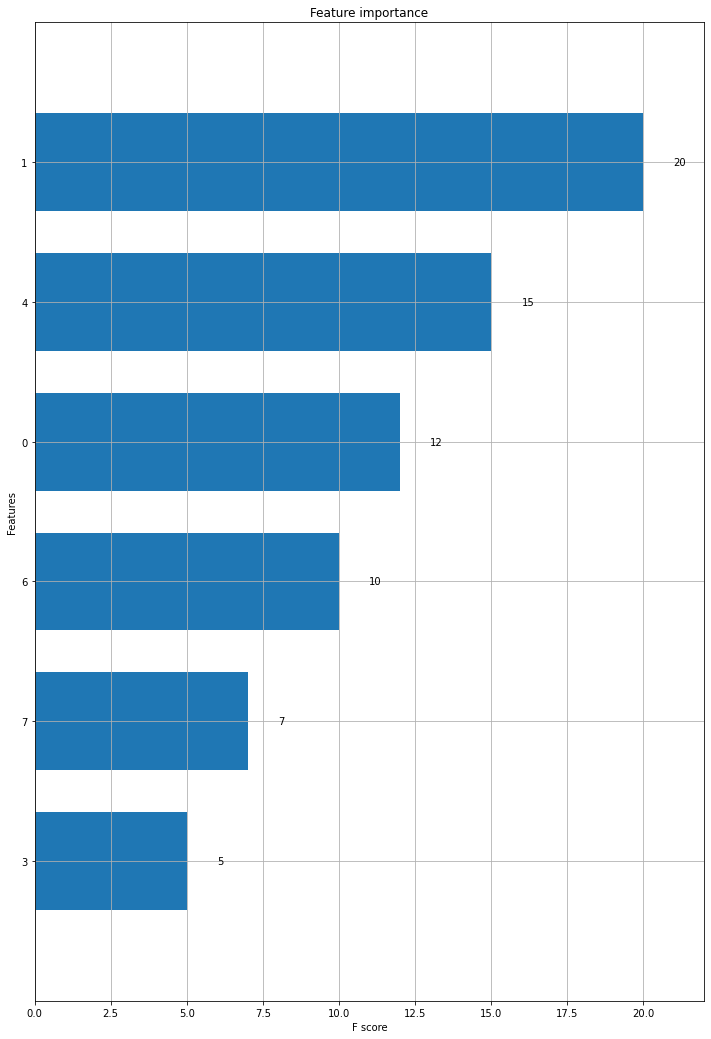

In [90]:
# Visualize feature importances.
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=1000, height=0.7, ax=ax)
plt.show()


In [81]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("F1 Score = {}".format(f1_score(y_test, best_preds,average='macro')))

Precision = 0.9838733034116155
Recall = 0.983931629928683
Accuracy = 0.9839088166275561
F1 Score = 0.9839006948660864


In [ ]:
# Evaluate your result and select best performing algorithm for our case.
#CGBBooster is better algorithm in this case.